# Assignment Chapter 2 - DEEP LEARNING [Case #3]
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Task: **REGRESSION**
* DL Framework: **Tensorflow-Keras**
* Dataset: California House Price
* Libraries: Pandas, Numpy, Scikit-learn, Matplotlib
* Objective: Predict House Pricing with Dual Input Settings using Multilayer Perceptron

`PERSYARATAN` Semua modul (termasuk versi yang sesuai) sudah di-install dengan benar.
<br>`CARA PENGERJAAN` Lengkapi baris kode yang ditandai dengan **#TODO**.
<br>`TARGET PORTFOLIO` Peserta mampu memprediksi harga rumah menggunakan *Multilayer Perceptron*

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

### Load Dataset

In [ ]:
housing = fetch_california_housing()
print("Features name: {}".format(housing.feature_names))
print("Features data:\n{}".format(housing.data))
print("Target data:\n{}".format(housing.target)) # target is the house price

Features name: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Features data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
Target data:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
# TODO: Ubah "features" dan "target" dari Numpy Array ke Pandas DataFrame
datafr = pd.DataFrame(housing.data, columns=housing.feature_names)
datafr['Target'] = housing.target
datafr.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Train / Validation / Test Split

In [ ]:
# TODO: Pisahkan data menjadi train, validation, dan test
# HINT: Pertama, pisahkan data menjadi train dan test.
#       Selanjutnya, pisahkan data train menjadi dua, yaitu data train dan data validation.

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print("x_train", x_train.shape, "y_train", y_train.shape)
print("x_val", x_val.shape, "y_val", y_val.shape)
print("x_test", x_test.shape, "y_test", y_test.shape)

x_train (14860, 8) y_train (14860,)
x_val (1652, 8) y_val (1652,)
x_test (4128, 8) y_test (4128,)


### Standardization and Normalization

In [ ]:
# TODO: Lakukan standarisasi untuk data train, validation, dan test menggunakan StandardScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

print("x_train", x_train.shape, "y_train", y_train.shape)
print("x_val", x_val.shape, "y_val", y_val.shape)

x_train (14860, 8) y_train (14860,)
x_val (1652, 8) y_val (1652,)


In [ ]:
# TODO: Lakukan normalisasi untuk data train, validation, dan test menggunakan MinMaxScaler()
normalizer = MinMaxScaler()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

print("x_train", x_train.shape, "y_train", y_train.shape)
print("x_val", x_val.shape, "y_val", y_val.shape)

x_train (14860, 8) y_train (14860,)
x_val (1652, 8) y_val (1652,)


### Advanced Splitting
Perform an advance split into **multiple overlapping input (A and B)**, where **input A** consists of feature 0 to 4 and **input B** consists of feature 2 to 7.

In [ ]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_val_A, x_val_B = x_val[:, :5], x_val[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]

# samples to predict after training
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

print("x_train_A", x_train_A.shape, "x_train_B", x_train_B.shape)
print("x_val_A", x_val_A.shape, "x_val_B", x_val_B.shape)
print("x_test_A", x_test_A.shape, "x_test_B", x_test_B.shape)

x_train_A (14860, 5) x_train_B (14860, 6)
x_val_A (1652, 5) x_val_B (1652, 6)
x_test_A (4128, 5) x_test_B (4128, 6)


### Regression Modeling with Neural Network

<font color="red">**- - - - MOHON DIPERHATIKAN - - - -**</font>
<br> Keras/Tensorflow akan **secara otomatis** menambah layer neural network apabila kamu menjalankan ulang *cell* terkait. Jadi, silakan <b>*restart kernel*</b> dan jalankan ulang (*rerun*) semua kode agar hasil sesuai.

> <font color="red"> **(Step 1) Build the Model**</font>

Yang dilakukan pada tahap ini:
* Tentukan *parameters*, yaitu `weight` dan `bias`
* Tentukan *hyperparameters*, yaitu total neurons di (1) input layers, (2) hidden layers, and (3) output layer
* Tentukan *activation functions*

<br> Lihat dokumentasi **Keras Core Layers** [**disini**](https://keras.io/api/layers/core_layers/).
<br> Lihat dokumentasi **Keras Model.summary()** dan **Model.get_layers() method**  [**disini**](https://keras.io/api/models/model/#summary-method).
<br> Lihat dokumentasi **Keras Layer Initializer** untuk *weights* (*kernel_initializer*) dan *biases* (*bias_initializer*) [**disini**](https://keras.io/api/layers/initializers/).
<br> Lihat dokumentasi **Keras Activation Functions** [**disini**](https://keras.io/api/layers/activations/).

Secara default di bagian `.layers.Dense()`, sudah ditentukan `activation=None`, `kernel_initializer="glorot_uniform"` dan `bias_initializer="zeros"`.

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])

# TODO: Buat hidden layer pertama dengan 30 neuron dan ReLU sebagai activation function
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# TODO: Buat hidden layer kedua dengan 30 neuron dan ReLU sebagai activation function
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
regression_model = keras.Model(inputs=[input_A, input_B], outputs=[output])
regression_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            210 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 35)             │              0 │ input_layer[0][0],     │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             36 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

> <font color="red"> **(Step 2) Compile the Model** </font>

Yang dilakukan pada tahap ini:
* Tentukan `loss_function`, `optimizer` (termasuk `learning_rate` dan `momentum`), dan `metrics` (opsional)

Lihat dokumentasi **Keras Model.compile() method** [**disini**](https://keras.io/api/models/model_training_apis/#compile-method).
<br> Lihat dokumentasi **Keras Loss Function** [**disini**](https://keras.io/api/losses/).
<br> Lihat dokumentasi **Keras Optimizers** [**disini**](https://keras.io/api/optimizers/).
<br> Lihat dokumentasi **Keras Metrics** [**disini**](https://keras.io/api/metrics/).

In [ ]:
# TODO: Tentukan learning rate
lr = 0.01

regression_model.compile(
    loss=["mean_squared_error"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr)
)

**Catatan:** Di Keras-Tensorflow,
* `loss="mean_squared_error"` **ekuivalen** dengan `loss=tf.keras.losses.MeanSquaredError()`
* `optimizer="Adam"` **ekuivalen** dengan `optimizer=tf.keras.optimizers.Adam()`

> <font color="red"> **(Step 3) Train the Model** </font>

Yang dilakukan pada tahap ini:
* Tentukan *learning hyperparameters*, yaitu `epochs` dan `batch_size`
* Inisiasi `validation_data` (opsional)

Lihat dokumentasi **Keras Model.fit() method** [**disini**](https://keras.io/api/models/model_training_apis/#fit-method).

In [ ]:
# TODO: Tentukan jumlah epoch (iterasi)
n_epoch = 100

# TODO: Tentukan jumlah batch
batch_size = 32

In [ ]:
reg_result = regression_model.fit(
    x=[x_train_A, x_train_B],
    y=[y_train, y_train],
    epochs=n_epoch, batch_size=batch_size,
    validation_data=([x_val_A, x_val_B], [y_val, y_val])
)

Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.6382 - val_loss: 1.1367
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0395 - val_loss: 0.9922
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.9133 - val_loss: 0.8850
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8168 - val_loss: 0.8004
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7379 - val_loss: 0.7284
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6685 - val_loss: 0.6651
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6048 - val_loss: 0.6144
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5571 - val_loss: 0.5836
Epoch 9/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5269 - val_loss: 0.5668
Epoch 10/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5100 - val_loss: 0.5576
Epoch 11/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5004 - val_loss: 0.5518
Epoch 12/100
465/465 ━━━━━━━━━━━━━━━━━━━━

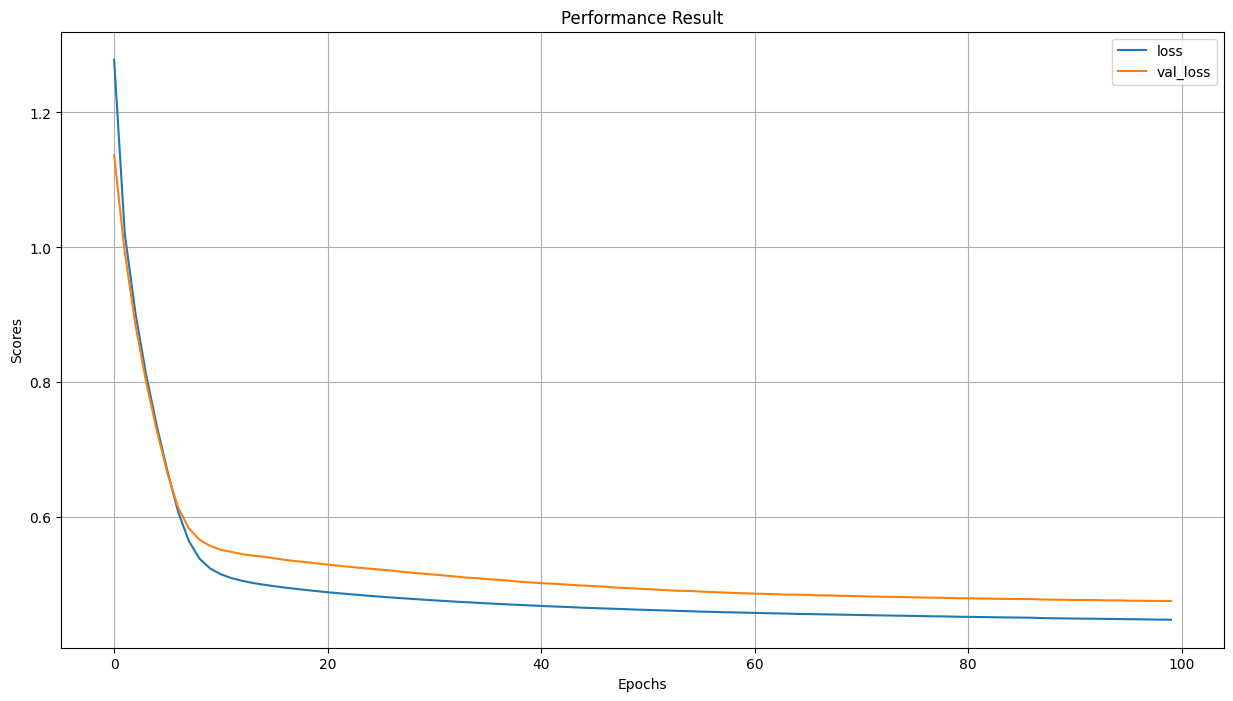

In [ ]:
pd.DataFrame(reg_result.history).plot(figsize=(15, 8))

plt.title("Performance Result")
plt.xlabel("Epochs")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

<font color="red">**- - - - STOP, CEK DULU! - - - -**</font>
<br>Sebelum melakukan evaluasi dan penyimpanan model, **pastikan *val_loss* berada dibawah 0.50** dan **tidak terjadi *overfitting***.
<br>Silakan ulangi langkah diatas sebagai langkah *hyperparameter tuning* jika terjadi.

> <font color="red"> **(Step 4) Evaluate the Model with Test Data** </font>

Lihat dokumentasi **Keras Model.evaluate() method** [**disini**](https://keras.io/api/models/model_training_apis/#evaluate-method).

In [ ]:
regression_model.evaluate([x_test_A, x_test_B], [y_test, y_test])

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4494


0.45875072479248047

> <font color="red"> **(Step 4) Save and Reload the Model** </font>

In [ ]:
# TODO: Berikan nama file untuk model, diakhiri dengan ekstensi .keras
filename = "02-Kelompok F-3.keras"

# save the model into your local storage
regression_model.save(filename)

In [ ]:
# TODO: Reload model dan lakukan prediksi dengan data baru (x_new_A dan x_new_B)
this_model = tf.keras.models.load_model(filename)
this_model.predict([x_new_A, x_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


array([[0.3801299],
       [0.8301108],
       [2.7361417]], dtype=float32)

### Scoring
Total `#TODO` = 10
<br>Checklist:

- [✔️] Ubah "features" dan "target" dari Numpy Array ke Pandas DataFrame
- [✔️] Pisahkan data menjadi train, validation, dan test
- [✔️ ] Lakukan standarisasi untuk data train, validation, dan test menggunakan StandardScaler()
- [✔️] Lakukan normalisasi untuk data train, validation, dan test menggunakan MinMaxScaler()
- [✔️] Buat hidden layer pertama dengan 30 neuron dan ReLU sebagai activation function
- [✔️] Buat hidden layer kedua dengan 30 neuron dan ReLU sebagai activation function
- [✔️] Tentukan jumlah epoch (iterasi)
- [✔️] Tentukan jumlah batch
- [✔️] Berikan nama file untuk model, diakhiri dengan ekstensi .keras
- [✔️] Reload model dan lakukan prediksi dengan data baru (`x_new_A` dan `x_new_B`)

### Additional readings
- N/A

### Copyright © 2024 Startup Campus, Indonesia
* Prepared by **Nicholas Dominic, M.Kom.** [(profile)](https://linkedin.com/in/nicholas-dominic)
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.